In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab,six,matplotlib 
from matplotlib import markers,lines,colors
from scipy import interpolate
mk=np.tile(markers.MarkerStyle.filled_markers,3)
ck=list(six.iteritems(colors.cnames))
matplotlib.rc('font',family='serif',size=9)
from tikzplotlib import save as tikz_save
from iapws import IAPWS97

import thermo as th

In [13]:
vodka = th.Mixture(['water', 'ethanol'], Vfls=[.6, .4], T=300, P=1E5)

In [14]:
vodka?

In [2]:

sat_steam=IAPWS97(P=1,x=1)                #saturated steam with known P
sat_liquid=IAPWS97(T=370, x=0)            #saturated liquid with known T
steam=IAPWS97(P=2.5, T=500)               #steam with known P and T
print(sat_steam.h, sat_liquid.h, steam.h) #calculated enthalpies

(2777.1195376846617, 405.81466030352686, 2811.704862899988)


In [10]:
vodka?

In [3]:
sat_steam.T

453.0356323914666

<IPython.core.display.Javascript object>


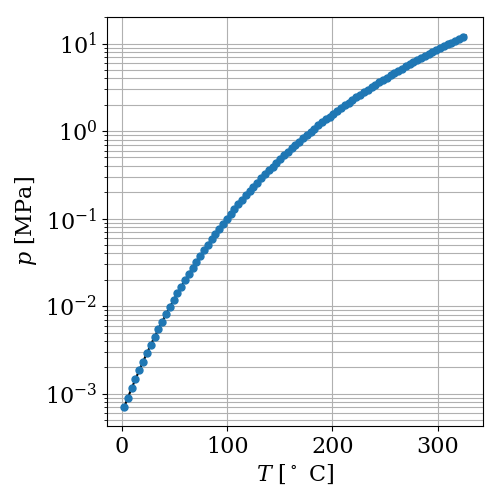

In [6]:
xis = np.linspace(0,1,30)
presiones = np.linspace(0.01,22,100)

fig0,ax0 = plt.subplots(figsize=(5,5))   

curvat1 = []


Tmin = 275
Tmax = 600
Temps = np.linspace(Tmin,Tmax,450)
curvat2= []
for j,Ti in enumerate(Temps):
    steam =  IAPWS97(T=Ti,x=1)
    curvat2.append((steam.P,Ti) )
curvat2 = np.asarray(curvat2)
ax0.semilogy(curvat2[:,1]-273,curvat2[:,0],'k-',markersize=2)
ax0.semilogy(curvat2[::5,1]-273,curvat2[::5,0],marker='o',markersize=5,linestyle='none')
ax0.grid(which='both')
ax0.set_ylabel(r'$p$ [MPa]');
ax0.set_xlabel(r'$T$ [$^\circ$ C]');
fig0.tight_layout()
#tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/condensacion/tikzs/p_sat_vapor.tikz')
#ax0.plot(curvat[:,0],curvat[:,4],'k.')
#ax0.plot(curvat[:,0],curvat[:,5],'b.')

<IPython.core.display.Javascript object>


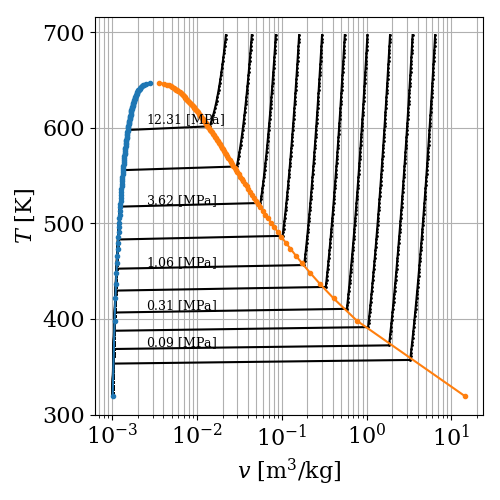

In [12]:
xis = np.linspace(0,1,30)
presiones = np.linspace(0.01,22,100)

fig0,ax0 = plt.subplots(figsize=(5,5))   

curvat1 = []

for i,pi in enumerate(presiones):
    sat_steam = IAPWS97(P=pi, x=1)
    sat_liq = IAPWS97(P=pi, x=0)
    curvat1.append((sat_steam.v,sat_steam.T,sat_liq.v))
curvat1 = np.asarray(curvat1)


Tmin = curvat1[:,1].min()
Tmax = curvat1[:,1].max()
Temps = np.linspace(Tmin,Tmax+50,100)

presiones = np.exp(np.linspace(-3,3,50))
for i,pi in enumerate(presiones[::5]):
    curvat2 = []
    for j,Ti in enumerate(Temps):
        steam =  IAPWS97(P=pi,T=Ti)
        curvat2.append((steam.v,pi,Ti) )
    curvat2 = np.asarray(curvat2)
    ax0.semilogx(curvat2[:,0],curvat2[:,2],'k.-',markersize=2)
    if i/2 != i/2.:
        ind_t = np.abs(curvat2[:,0]-1e-2).argmin()
        ax0.text(0.0025,curvat2[ind_t,2]+2,r'$%.2f$ [MPa]'%(pi))

ax0.semilogx(curvat1[:,2],curvat1[:,1],'.-')
ax0.semilogx(curvat1[:,0],curvat1[:,1],'.-')
ax0.grid(which='both')
ax0.set_xlabel(r'$v$ [m$^3/$kg]');
ax0.set_ylabel(r'$T$ [K]');
fig0.tight_layout()
tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/condensacion/tikzs/T_v_vapor.tikz')
#ax0.plot(curvat[:,0],curvat[:,4],'k.')
#ax0.plot(curvat[:,0],curvat[:,5],'b.')


In [13]:
curvat2.shape

(100, 3)

In [14]:
Ti

696.8565652247645